In [265]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [266]:
df=pd.read_csv("/content/Titanic_Survival_train.csv")
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,Lower,22.0,1,0,7.2500,3,1
1,2,1,Upper,38.0,1,0,71.2833,1,0
2,3,1,Lower,26.0,0,0,7.9250,3,0
3,4,1,Upper,35.0,1,0,53.1000,3,0
4,5,0,Lower,35.0,0,0,8.0500,3,1


In [267]:
print('Shape of Titanic data set is :',df.shape)
print('Size of Titanic data set is  :',df.size)

Shape of Titanic data set is : (889, 9)
Size of Titanic data set is  : 8001


In [268]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Sex
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,29.736783,0.524184,0.382452,32.096681,2.535433,0.646794
std,256.998173,0.486260,12.714905,1.103705,0.806761,49.697504,0.792088,0.478235
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,224.000000,0.000000,22.000000,0.000000,0.000000,7.895800,2.000000,0.000000
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,3.000000,1.000000
75%,668.000000,1.000000,35.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    int64  
 8   Sex          889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [272]:
# Checking columns with data types as object
df.select_dtypes(include='O')

,Pclass
0,Lower
1,Upper
2,Lower
3,Upper
4,Lower
...,...
884,Middle
885,Upper
886,Lower
887,Upper


In [273]:
df.Pclass.value_counts()

Lower     491
Upper     214
Middle    184
Name: Pclass, dtype: int64

Here we have to predict passenger survived or not .
Survival (0 = No; 1 = Yes).

Here Passanger PClass is in category -Lower, Middle & Upper

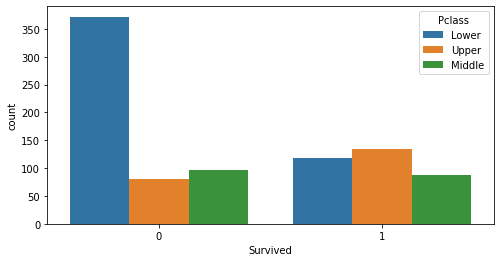

In [274]:
plt.figure(figsize=(8,4))
sns.countplot(x='Survived',hue='Pclass',data=df,order=(0,1))

**Observation : Major -Person not survived are of Lower Category**

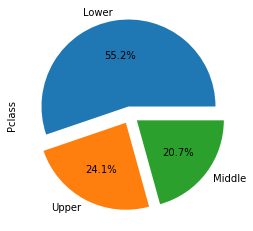

In [275]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0.1, 0.1, 0.1])


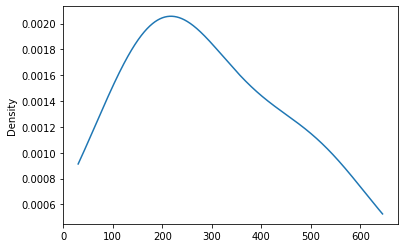

In [276]:
df['Pclass'].value_counts().plot(kind='kde')

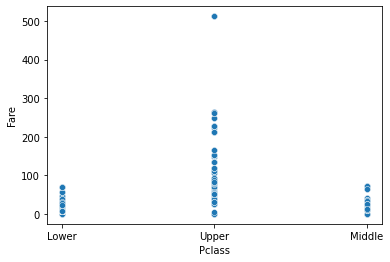

In [277]:
sns.scatterplot(data=df, x="Pclass", y="Fare")

Upper Class Passanger has More fare as compaire to Lower & Middle

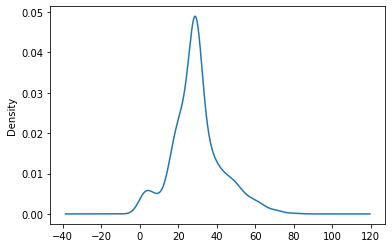

In [278]:
df['Age'].plot(kind='kde')

Observation : Most Passanger are of age group 20-40

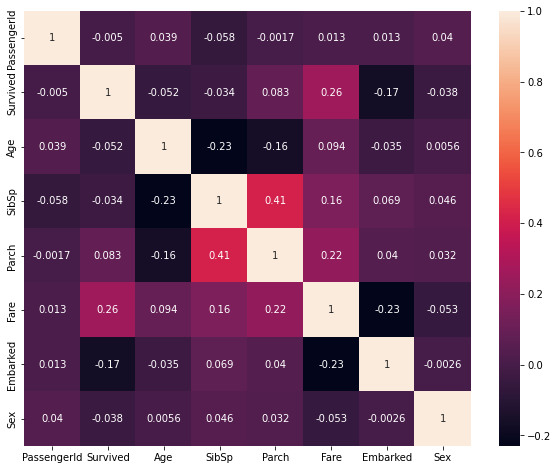

In [280]:
from matplotlib import figure
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

No strong corelation found.

so we can use Naive Bayes Classifier and also check accuracy with LogisticRegression.

Naive Bayes Classifier It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [281]:
df.sample()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
392,394,1,Upper,23.0,1,0,113.275,1,1


**Preprocessing of Data**

As Pclass is Categorial , first we will transform column .

In [282]:
def Pclass_name(x):
  if x=="Lower":
      x=0
  elif x=="Upper":
      x=1
  else:
      x=2
  return x

In [283]:
df['Pclass']=df['Pclass'].apply(lambda x :Pclass_name(x))
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,0,22.0,1,0,7.2500,3,1
1,2,1,1,38.0,1,0,71.2833,1,0


In [284]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex'],
      dtype='object')

In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Pclass','Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex']]=scaler.fit_transform(df[['Pclass','Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex']])

In [294]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,-0.818319,-0.608824,0.43135,-0.474326,-0.500240,0.586840,0.738977
1,2,1,0.431656,0.650250,0.43135,-0.474326,0.788947,-1.939555,-1.353222


**Build Machine Learning Pipeline & Hyper Parameter Grid Tuning**

In [295]:
print(df.shape)
print(f"Columns names are as follows --------")
print(df.columns)

(889, 9)
Columns names are as follows --------
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex'],
      dtype='object')


In [296]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    float64
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    float64
 5   Parch        889 non-null    float64
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    float64
 8   Sex          889 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 62.6 KB
None


In [297]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex            0
dtype: int64

**Train-Test Split**

In [298]:
X=df.iloc[:,2:9]
y=df['Survived']

In [299]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(800, 7)
Shape of Test Xs:(89, 7)
Shape of Training y:(800,)
Shape of Test y:(89,)


Logistic Regression

In [300]:
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegression

In [301]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
score=model.score(x_test,y_test);#testing the GaussianNB model

In [302]:
print(f"Accuracy Score of LogisticRegression{model.score(x_test,y_test)}")

Accuracy Score of LogisticRegression0.6629213483146067


**Naive-Bayes**

In [303]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the GaussianNB model

In [304]:
# Model diagnostic
print(f"Accuracy of GaussianNB --->{clf.score(x_test,y_test)}")
print(y_predicted)

Accuracy of GaussianNB --->0.6741573033707865
[0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]


In [308]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[51, 10],
       [19,  9]])

In [309]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [258]:

import itertools

Confusion matrix, without normalization
[[51 10]
 [19  9]]
Normalized confusion matrix
[[0.84 0.16]
 [0.68 0.32]]


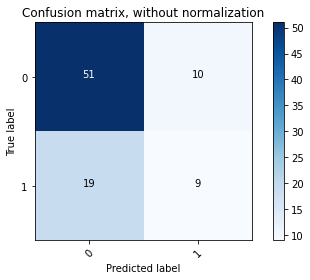

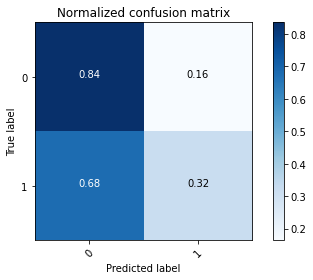

In [310]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix,classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix,classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Observation :
51+10  i.e person not survived
out of that 9 cases we are able to predicted that person servived with Gussian NaiveBase.